# ABI - Automated Bot for Inquiries

Neste Notebook, temos todo o workflow de construção de nossa solução ao problema proposto pela Olist.

Para a solução do problema, propomos o desenvolvimento de um robô que responda às perguntas feitas por potenciais compradores nas páginas do marketplace, e que, além disso, proporcione aos vendedores (ou à Olist) informações relevantes acerca dos tipos e recorrência de perguntas nos anúncios. 

O nosso robô será responsável por responder de forma rápida e precisa às perguntas dos potenciais compradores, resolvendo, assim, o grande problema de comunicação entre vendedor e potencial comprador, e contribuindo para o aumento na taxa de conversão de venda.

A implementação do robô tem duas componentes fundamentais, como explicaremos a seguir através de um exemplo: digamos que um usuário está na página de anúncio de uma cafeteira, e ele faz a seguinte pergunta: "tem vermelha?". Ao ler essa pergunta, o robô acionará suas duas componentes, que são:

1) A componente inteligente, que é responsável por identificar qual é a intenção da pergunta, apenas ao lê-la. Com a pergunta "tem vermelha?", o robô deve ser capaz de identificar que o usuário está querendo saber sobre as cores do produto. Para isso, contaremos com um algoritmo de inteligência artificial, que nada mais é do que um algoritmo de classificação: com base na pergunta, o robô deve ser capaz de, automaticamente, entender qual a intenção da pergunta, isto é, determinar à que classe a pergunta pertence: em nosso exemplo, seria à classe de "cores". Para responder, entra a segunda componente:

2) A componente de consulta: uma vez entendido sobre o que se trata a pergunta, o robô deve se direcionar ao arquivo de cadastro daquele produto e procurar o atributo correspondente à intenção da pergunta. Isto é, em nosso exemplo, o robô vai no arquivo de cadastro da cafeteira, que deve conter um campo onde estão listadas as cores disponíveis. Ao ler as cores disponíveis, o robô pode então responder ao usuário quais elas são, em uma resposta como: "Olá! As cores disponíveis são Azul, Preto e Vermelho!".

E, com essas duas componentes, o robô é capaz de responder às perguntas :)

Nossa solução propõe o seguinte novo fluxo de perguntas pré-venda, que passa a ter 4 etapas:

1) Possível comprador faz uma pergunta sobre determinado produto na página do marketplace;
2) O marketplace sinaliza que há uma pergunta sobre determinado produto, e a envia através de uma API para a Olist;
3) (Essa é a nova etapa de mossa solução) Nosso algoritmo, embarcado no portal da Olist, receberá a pergunta, a processará, e formulará a resposta adequada, de forma virtualmente instantânea;
4) A Olist devolve a pergunta respondida para o Marketplace, através de outra API.

Através do fluxo acima, fica claro que nossa solução dispensa qualquer interface gráfica. Como o algoritmo estará embarcado na plataforma da olist, o que importa é seu código fonte. No entanto, para fins de apresentação, faremos uma interface gráfica bem simples, apenas para fins de demonstração da usabilidade do algoritmo.

O workflow foi dividido em diversos passo, a saber:

__- Passo 0: importação de bibliotecas__
	- Nesta etapa, importamos as bibliotecas necessárias para a implementação do algoritmo completo;

__- Passo 1: leitura de dados__
	- Nesta etapa, importamos para o workflow as duas bases necessárias para a construção do modelo: a base de perguntas (que contém as perguntas e os respectivos intents classificados); e a base de produtos (que contém os produtos cadastrados).

__- Passo 2: pré-processamento__
	- Nesta etapa, fazemos todo o pré-processamento de texto para a construção do modelo. É aqui que aplicamos as principais ferramentas de NLP (Processamento de Linguagem Natural, na sigla em inglês) para transformar o texto das perguntas em vetores numéricos que serão o input do modelo.

__- Passo 3: modelagem preditiva__
	- Nesta etapa, construímos e treinamos o modelo de machine learning capaz de prever o intent de uma determinada frase. Também avaliamos a performance do modelo na base de validação.

__- Passo 4: formulação das respostas__
	- Nesta etapa, construímos a resposta do bot para à pergunta feita. Para isso, usamos o intent predito pelo modelo para fazer uma query à base de produto, que contêm informações de cadastro do produto. A resposta do bot é então construída, utilizando as informações da base de produtos de maneira flexível.

__- Passo 5: analytics__
	- Nesta etapa, tomamos a base de teste e avaliamos a performance do modelo, produzindo gráficos para auxiliar a interpretação dos resultados. Esta etapa simula como seria o modelo em produção, e que tipo de informações relevantes o usuário pode receber após o modelo estar em funcionamento.

__- Passo 6: interface gráfica__
	- Nesta etapa, construímos a interface gráfica e a integramos com o modelo, de modo a simular o processo de perguntas e respostas na plataforma do marketplace.


Vamos começar!

## Passo 0: importação de bibliotecas

Usaremos as seguintes bibliotecas para as respectivas finalidades:

- <a href=https://numpy.org/>Numpy</a>: para vetorização de dados;
- <a href=https://pandas.pydata.org/>Pandas</a>: para manipulação de base dados;
- <a href=https://www.nltk.org/>NLTK</a>: para ferramentas de NLP;
- <a href=https://scikit-learn.org/stable/>Scikit-learn</a>: para modelagem estatística e machine learning;
- <a href=https://www.tensorflow.org/>TensorFlow</a>: framework de redes neurais (usada para testes);
- <a href=https://keras.io/>Keras</a>: API de alto nível para o TensorFlow;
- <a href=https://matplotlib.org/>Matplotlib</a>: para plots e visualizações;
- <a href=https://seaborn.pydata.org/>Seaborn</a>: para plotagem estatística;
- <a href=https://docs.python.org/3/library/tkinter.html>Tkinter</a>: para a construção da interface gráfica;
- <a href=https://docs.python.org/3/library/random.html>random</a>: para números aleatórios;
- <a href=https://docs.python.org/3/library/re.html>re</a>: para processamento de regex;
- <a href=https://docs.python.org/3/library/ast.html>ast</a>: pra trasnformar string em dicionário;

### Importando de principais bibliotecas

In [1]:
#processamento de dados
import numpy as np
import pandas as pd

#regex
import re

#nlp
import nltk
# nltk.download('stopwords')
# nltk.download('rslp')

#dataviz
import matplotlib.pyplot as plt

#random, para reproducibilidade
import random

#pra tirar acentos
import unidecode

#pra transformar string em dict
import ast

#para plotagem
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

Demais módulos específicos de outras bibliotecas serão importados conformea necessidade ao decorrer do processo.

_______________
_______________
_______________


## Passo 1: leitura de dados

### Lendo a base de perguntas

A documentação da base está no repositório, no arquivo README. Leia a documentação para informações detalhadas sobre a construção e conteúdo da base.

A base de perguntas tem duas colunas e 1200 linhas, onde cada linha é relativa a uma pergunta, e as colunas são:

- "intent" : contém um entre os 12 intents possíveis. Essa é a coluna de target do modelo;

- "pergunta" : contém uma pergunta cuja intenção é dada pelo respectivo intent. Essa é a coluna de features do modelo (que deverá passar por um pré-processamento através de técnicas de NLP).

In [2]:
#numero de perguntas pra cada intent
n = 100

df_perguntas = pd.read_csv("base_treino_" + str(n) + ".csv")

#é bom dar uma misturada...
df_perguntas = df_perguntas.sample(frac=1, random_state = 42).reset_index(drop=True)
 
#essa é a base desbalanceada
df_desbalanc = df_perguntas[~df_perguntas["intent"].isin(df_perguntas["intent"].value_counts()[df_perguntas["intent"].value_counts() == n].index.tolist())]

#essa é a base balanceada (vou manter o mesmo nome)
df_perguntas = df_perguntas[df_perguntas["intent"].isin(df_perguntas["intent"].value_counts()[df_perguntas["intent"].value_counts() == n].index.tolist())]
    
if (~df_perguntas["intent"].value_counts().values == n).sum() == 0:
    print("Bases balanceada e desbalanceadas separadas com sucesso!")
    print("\nCinco primeiras linhas da base de treino:")
    display(df_perguntas.head())
else:
    print("Erro... Olha o código!")
    assert(False)

Bases balanceada e desbalanceadas separadas com sucesso!

Cinco primeiras linhas da base de treino:


,intent,pergunta
0,Voltagem,É 110 volt
1,Garantia,amigo vou precisar de garantia pode me emitir ...
2,Bateria,Quantos mah tem essa bateria
3,Dimensão,quantos cms tem?
4,Acessórios,Ele vem com mause e teclado ? E estabilizador?


In [3]:
#informações rápidas sobre a composição da base

df_perguntas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 0 to 1199
Data columns (total 2 columns):
intent      1200 non-null object
pergunta    1200 non-null object
dtypes: object(2)
memory usage: 28.1+ KB


In [4]:
#pequena análise exploratório do conteúdo da base

perguntas = df_perguntas.iloc[:,1]
print("\nTemos", len(perguntas), "perguntas na base.\nAs perguntas estão distribuídas em diferentes intents.\n")

intents = df_perguntas.iloc[:,0]
print("Temos", len(intents.unique()), "intents na base, com as respectivas quantidades de perguntas:")
display(intents.value_counts())


Temos 1200 perguntas na base.
As perguntas estão distribuídas em diferentes intents.

Temos 12 intents na base, com as respectivas quantidades de perguntas:


Cor                   100
Estado                100
Bateria               100
Capacidade            100
Garantia              100
Disponibilidade       100
Nota Fiscal           100
Dimensão              100
Entrega               100
Meios de pagamento    100
Acessórios            100
Voltagem              100
Name: intent, dtype: int64

### Lendo a base de produtos

A documentação da base está no repositório, no arquivo README. Leia a documentação para informações detalhadas sobre a construção e conteúdo da base.

A base de produtos tem 13 colunas (uma para o nome do produto e 12 para os intents) e 10 linhas, onde cada linha se refere a um produto, e cada coluna contém um dicionário com as informações relativas àquele intente do respectivo produto.

In [5]:
base_de_produtos = pd.read_csv("base_produto.csv")

In [6]:
#informações rápidas sobre a composição da base

base_de_produtos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 13 columns):
Produto               10 non-null object
Acessórios            10 non-null object
Cor                   10 non-null object
Capacidade            10 non-null object
Bateria               10 non-null object
Dimensão              10 non-null object
Disponibilidade       10 non-null object
Entrega               10 non-null object
Estado                10 non-null object
Garantia              10 non-null object
Meios de pagamento    10 non-null object
Nota Fiscal           10 non-null object
Voltagem              10 non-null object
dtypes: object(13)
memory usage: 1.1+ KB


In [7]:
print("Exemplo de cadastro do primeiro produto na base:\n")
base_de_produtos.iloc[0,:]

Exemplo de cadastro do primeiro produto na base:



Produto               {"produto": "Controle joystick Sony Dualshock ...
Acessórios                                               {"controle":1}
Cor                                                         {"azul": 1}
Capacidade                                                           {}
Bateria                                           {"duracao":"8 horas"}
Dimensão              {"comprimento":"5 cm","largura":"10 cm","altur...
Disponibilidade                                           {"estoque":1}
Entrega               {"texto":"Entregamos para todo o Brasil, favor...
Estado                {"texto":"Nossos produtos são novos, originais...
Garantia              {"garantia_fornecedor":"90 dias","garantia_oli...
Meios de pagamento    {"cartao_credito":"sim","cartao_debito":"nao",...
Nota Fiscal                                              {"nota":"sim"}
Voltagem                                                     {"120V":1}
Name: 0, dtype: object

In [8]:
#lista dos produtos construida a partir da base de produtos
lista_de_produtos = [list(ast.literal_eval(item).values())[0] for item in base_de_produtos["Produto"].tolist()]

print("Produtos cadastrados na base:\n")
print(*lista_de_produtos, sep=";\n")

Produtos cadastrados na base:

Controle joystick Sony Dualshock 4 500 million limited edition;
Ventilador de mesa Arno VF;
Samsung Galaxy J2;
Piscina estrutural Botafogo PIS0628;
Pendrive SanDisk Cruzer Blade;
Pipoqueira elétrica Lenoxx PPC 953;
Churrasqueira móvel Mec G CHUIN02;
Relógio Digital Unissex Champion Ch40080t;
Forno Elétrico Inox Premium Lenoxx- Pfo 303;
Controle Remoto Tv Cce Mod Rc-517


_______________
_______________
_______________


## Passo 2: pré-processamento

Nesta etapa, vamos aplicar as técnicas de NLP para a criação do corpus e do modelo de bag-of-words.

### Criação do corpus a partir das perguntas da base de treino

A etapa de pré-processamento dos dados é de extrema importância em todo projeto de ciência de dados. Muitas vezes os dados coletados não podem ser utilizados na construção de um modelo antes que este sejam processadas. 

No nosso caso, nossos dados de treino são perguntas (portanto, do tipo de dados string). Acontece que os modelos de machine learning não aceitam strings como input, apenas dados numéricos! Para isso, teremos de transformar as strings de perguntas em alguma forma de representação numérica. Para fazer isso, usaremos as técnicas de NLP!

A primeira etapa é a construção do corpus, que nada mais é que uma lista com todas as perguntas da base de treino após sua limpeza. A limpeza consiste nos seguintes passos:

- Retirada de caracteres que não agregam significado, como pontuações ("!", "(", ".", etc) e números (embora mantemos os números 0, 1 e 2 pois estes são úteis para o intent de "Voltagem");

- Conversão de todas as letras em minúsculas, para que não haja distinção entre palavras capitalizadas ou não;

- Aplicação de stemming, que consiste na limpeza de sufixos, prefixos e terminações das palavras, de modo que reste apenas sua raiz sintática. Testamos diversos stemmers disponíveis para o português, e o mais adequado foi o <a href=https://snowballstem.org/>Snowball (Porter2)</a>.

- Retirada de stopwords da língua portuguesa, que são palavras que não agregam significado para a determinação dos intents (em especial entram aqui artigos e preposições).

É importante ressaltar que a escolha das etapas de pré-processamento não é algo óbvio, dado que há muitas escolhas possíveis acerca do que se fazer para pré-processar os dados. As etapas que descrevemos acima foram definidas apenas depois de muitos testes iterativos, onde aplicamos diferentes combinações de técnicas de pré-processamento, conforme é descrito no Notebook "ABI_versão_inicial_1". A combinação de processos descrita acima foi a que gerou os melhores resultados, e por isso foi a que escolhemos para o modelo final.

In [9]:
#stopwords
stpwrds = nltk.corpus.stopwords.words('portuguese')

#essa é a função de pre-processamento
def pre_proc(pergunta, stpwrds=stpwrds):
    
    #vamos jogar fora tudo que não são letras minusculas e maiusculas (incluido acentuações)
    #vou manter também apenas os numeros 0,1,2, pra poder captar 110 e 220
    pergunta = re.sub("[^a-zA-ZáàâãéèêíïóôõöúçñÁÀÂÃÉÈÍÏÓÔÕÖÚÇÑ0-2]", " ", pergunta)

    #deixa tudo minuscula
    pergunta = pergunta.lower()

    #tonkeniza
    pergunta = pergunta.split()

    #stemmer SB
    stemmer = nltk.stem.SnowballStemmer('portuguese')
        
    #tira stopwprds. tora acentps e aplica o stemmer
    pergunta = [stemmer.stem(unidecode.unidecode(word)) for word in pergunta if word not in set(stpwrds)]

    #refaz a string
    pergunta = " ".join(pergunta)

    return pergunta

corpus = []

for item in perguntas:

    pergunta = pre_proc(item, stpwrds)

    #adiciona ao corpus
    corpus.append(pergunta)

In [10]:
# #aqui eu mostro a pergunta original e a versão pré-processada. Deixei comentado porque isso é muito grande. 
# #pra ver, é só descomentar e rodar

# print("\nComparação entre a pergunta original e a versão pré-processada da pergunta no corpus:\n")

# for i in range(len(perguntas)):
#     print(perguntas[i], "|", corpus[i])

Após a construção do Corpus, a próxima etapa é a construção do modelo de bag-of-words, que tem como objetivo transformar as strings de perguntas do corpus (features textuais) em vetores (features numéricas). Para isso, precisamos criar o vocabulário do corpus, e logo após fazer o <a href=https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html>one-hot encoding</a> de cada pergunta. Vamos fazer estas etapas separadamente a seguir, e discutir cada uma em maiores detalhes.

## Vocabulário

O vocabulário do corpus nada mais é do que uma listagem das palavras individuais que aparecem no corpus. Para encontrar o vocabulário, basta contarmos a aparição de cada palavra isolada no corpus. Ao fim, teremos N palavras únicas que compõem nosso vocabulário.

In [11]:
#só pra ter uma ideia do vocabulário, vamos fazer uma lista de listas com o formato:
#vocabulario[i] = [palavra, numero_de_aparicoes_no_corpus]

vocabulario = []
for pergunta in corpus:
    for palavra in pergunta.split():
        #não queremos palavras de uma única letra (pode acontecer devido ao stemming...)
        if len(palavra) > 1:
            if palavra not in [x[0] for x in vocabulario]:
                vocabulario.append([palavra, 1])
            else:
                vocabulario[[x[0] for x in vocabulario].index(palavra)][1] += 1
            
print("\nO vocabulário é formado por N =", len(vocabulario), "palavras!")

#a partir do vocabulário, crio um dataframe com a contagem
vocab_count = pd.DataFrame({"palavra": [],
                           "count": []})

vocab_count["palavra"] = pd.Series(vocabulario).apply(lambda x: x[0])
vocab_count["count"] = pd.Series(vocabulario).apply(lambda x: x[1])
vocab_count = vocab_count.sort_values("count", ascending=False)

print("\nTemos a seguir as 10 mais comuns, com as respectivas contagens:")
display(vocab_count.head(10))

raras = vocab_count[vocab_count["count"] == 1]
prop_raras = raras.shape[0]/vocab_count.shape[0]
print("\nA quantidade de palavras com apenas uma aparição no corpus (palavras raras)\né de " + str(raras.shape[0]) +
     ", o que equivale a", str(round(100*(prop_raras), 2)) + "% da base.")


O vocabulário é formado por N = 808 palavras!

Temos a seguir as 10 mais comuns, com as respectivas contagens:


,palavra,count
9,quant,151
61,boa,111
13,vem,109
5,garant,98
11,bat,80
65,produt,69
78,cor,65
62,tard,61
105,not,60
20,dia,58



A quantidade de palavras com apenas uma aparição no corpus (palavras raras)
é de 412, o que equivale a 50.99% da base.


## Bag-of-words

Após estudarmos o vocabulário, vamos efetivamente montar o modelo de bag-of-words. Este modelo funciona da seguinte forma:

- Pegue uma frase do corpus;
- Crie um vetor N-dimensional de inteiros (onde N é o número de palavras do vocabulário);
- Cada componente do vetor corresponde a uma palavra do vocabulário, segundo a ordem que as palavras aparecem no vocabulário.
- Preencha esse vetor com zeros (todas suas componentes serão 0);
- Para cada palavra da frase, mude a componente correspondente do vetor para 1;
- Faça isso para todas as frases do corpus;

Ao fim do processo acima para todas as frases do corpus (supomos que sejam M frases), nós empilhamos os respectivos vetores, de modo que teremos uma matriz de M linhas e N colunas. E essa matriz é o modelo final de bag-of-words, que por ser uma matriz numérica, pode ser facilmente usada como input pros modelos de machine learning!

Pra exemplificar o procedimento, vamos a um exemplo: suponha que nossa base de treino contenha as seguintes 3 frases (M = 3):

["Qual é a cor do produto?",<br>
"O produto vem com a Nota Fiscal?",<br>
"Qual o prazo de entrega pra SP?"]

Após o pre-processamento inicial das frases, o corpus final fica sendo:

["cor produt",<br>
"produt vem not fiscal",<br>
"praz entreg pra sp"]

Olhando pro corpus, é fácil ver que nosso vocabulário é:

["cor", "produt", "vem", "not", "fiscal", "praz", "entrega", "pra", "sp"].

É útil deixarmos o vocabulário em ordem alfabética:

["cor", "entrega", "fiscal", "not", "pra", "praz", "produt", "sp", "vem"].

Temos N = 9 palavras no vocabulário. O one-hot encoding de cada uma das frases do corpus irá, então, produzir um vetor 9-dimensional de 1 e 0, com 1 nas posições respectivas às palavras no vocabulário. Vamos entender:

Para a frase "cor produt", teremos um vetor com o numero 1 nas posições 0 (posição da palavra "cor") e 6 (posição da palavra "produt" do vocabulário, de forma que temos o vetor:

"cor produt" --> [1, 0, 0, 0, 0, 0, 1, 0, 0]

Analogamente, para as outras duas frases, teremos os vetores:

"produt vem not fiscal" --> [0, 0, 1, 1, 0, 0, 1, 0, 1]

"praz entreg pra sp" --> [0, 1, 0, 0, 1, 1, 0, 1, 0]

Finalmente, o modelo de bag-of-words (BoW) final é a matriz de dimensão 3 x 9 (M = 3 frases no corpus, N = 9 palavras no vocabulário), obtida ao empilhar os vetores:
  
$ BoW = \begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 1 & 1 & 0 & 0 & 1 & 0 & 1 \\
0 & 1 & 0 & 0 & 1 & 1 & 0 & 1 & 0
\end{pmatrix} $

Com esse exemplo, esperamos que o procedimento geral tenha ficado bem claro! :)

Naturalmente, tanto nosso corpus quanto nosso vocabulário serão muito maiores que os desse exemplo simples. Mas, o procedimento é exatamente o mesmo, e no final, teremos exatamente o mesmo output do modelo de bag-of-words: uma matriz M x N de 0 e 1, prontinha pra ser input dos modelos de machine learning!

Para fazer o bag of words propriamente, vamos usar o <a href=https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html>CountVectorizer</a> do sklearn:

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

#o max_feacutres imita o tamanho do vocabulario.. Não sei o quanto é interessante
# cv = CountVect}orizer(max_features = 1500)
cv = CountVectorizer()

#features
X = cv.fit_transform(corpus).toarray()

#target
# y = intents_num
y = intents.values

#validação
if X.shape[1] == vocab_count.shape[0] and X.shape[0] == len(perguntas):
    print("As dimensões da matriz de features estão corretas!")
    print("\nBag of words feito com sucesso!")
    print("\nO modelo BoW é uma matriz com as dimensões", X.shape)
    print("(pois, como vimos, temos M =", X.shape[0], "frases no corpus e N =", X.shape[1] , "palavras no vocabulário)")
else:
    print("As dimensões não batem! Reveja o código!")
    for item in [x[0] for x in vocabulario]:
        if item not in list(cv.vocabulary_.keys()):
            print(item)
    assert(False)

As dimensões da matriz de features estão corretas!

Bag of words feito com sucesso!

O modelo BoW é uma matriz com as dimensões (1200, 808)
(pois, como vimos, temos M = 1200 frases no corpus e N = 808 palavras no vocabulário)


_______________
_______________
_______________


## Passo 3: modelagem preditiva

Agora vem a etapa de construção do modelo!

Relembrando: o que queremos é um modelo que tenha como input uma frase (já pré-processada e vetorizada), e como output um dos intents.

Com isso, fica claro que precisamos de um __modelo de classificação multiclasse__, pois nosso objetivo é justamente classificar a pergunta de input entre uma das 12 classes (intents) possíveis!

Existem muitos modelos de classificação, e nós testamos muitos deles, como pode-se ver explicitamente nos notebooks "ABI_versão_inicial_1" e "ABI_versão_inicial_2". Os modelos que testamos (com combinações diferentes de hiperparâmetros) foram:

- Naive Bayes;
- Support Vector Machine;
- Random Forrest;
- Redes neurais;
- Regressão Logística Multinomial.

Dentre os testes que fizemos, todos os modelos tiveram boa performance. No entanto, devido à sua simplicidade e flexibilidade, decidimos por utilizar como modelo final a regressão logística multinomial, como apresentaremos a seguir.

Naturalmente, poderíamos testar ainda outras combinações de hiperparâmetros, bem como outros modelos mais complexos (XGBoost, outras arquiteturas de redes neurais, etc.). No entanto, devido às limitações de tempo e às muitas outras atividades envolvidas neste hackathon, decidimos por não dedicar tanto tempo neste processo iterativo de escolha de modelo.<br>
Ademais, como veremos mais à frente, o modelo simples que escolhemos já é altamente preciso, de modo que, dado o tempo limitado que temos, ele já nos supre muito bem.

Os passos que seguiremos, detalhados a seguir, são:

- Train-test split;
- Modelagem;
- Validação.


### Train-test split

Aqui, separamos nossa base de treino entre os dados que efetivamente serão usados para o treinamento do modelo, e dados que serão usados para a validação, na proporção de 80% pra treino e 20% pra validação. Os dados que compõem cada um dos conjuntos de teste e validação são selecionados aleatoriamente, mas estratificados de modo a garantir o balanceamento das classes, como já explicamos ser importante.

Os dados de validação _não_ são usados para o treinamento, e, assim sendo, podemos utilizá-los para testar a performance do modelo em dados não vistos em treinamento. A performance encontrada dará uma ideia do grau de viés e variância do modelo, isto é, entenderemos se o modelo sofre de overfitting ou underfitting, ao mensurarmos o quanto que suas previsões são generalizadas para dados não vistos em treinamento.

In [13]:
#train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)

print("Check de balanço do train-test split:")

print("\nNúmero de exemplos de cada intent para treino:")
display(pd.Series(y_train).value_counts())

print("\nNúmero de exemplos de cada intent para validação:")
display(pd.Series(y_test).value_counts())

Check de balanço do train-test split:

Número de exemplos de cada intent para treino:


Cor                   80
Estado                80
Bateria               80
Capacidade            80
Garantia              80
Disponibilidade       80
Nota Fiscal           80
Dimensão              80
Entrega               80
Meios de pagamento    80
Acessórios            80
Voltagem              80
dtype: int64


Número de exemplos de cada intent para validação:


Dimensão              20
Disponibilidade       20
Entrega               20
Meios de pagamento    20
Cor                   20
Nota Fiscal           20
Bateria               20
Capacidade            20
Voltagem              20
Acessórios            20
Garantia              20
Estado                20
dtype: int64

### Construção do modelo - Multinomial Logistic Regression

Conforme discutimos acima, utilizaremos como modelo de classificação uma regressão logística multinomial (ao qual nos referiremos como multi-logit).

O multi-logit é um modelo cujo objetivo é calcular, com base nas features (no caso, a pergunta vetorizada depois do pré-processamento) qual é a __probabilidade da pergunta ser classificada como cada um dos intents__. Ao "ler" a pergunta, o modelo atribui uma probabilidade a cada uma das classes, e aí a classe escolhida é simplesmente aquela com maior probabilidade! Simples, não é mesmo?

Temos apenas uma pequena complicação, que trataremos mais adiante, que é o caso em que há mais de um intent na mesma pergunta: um potencial cliente pode muito bem perguntar, na mesma pergunta, quais as cores disponíveis do produto, e quais as formas de pagamento. Nosso modelo deve também tentar responder a estas perguntas com mais de um intent. Mas este problema nós abordaremos um pouco mais adiante. 

Por enquanto, basta entendermos o funcionamento da regressão logística: que no final atribui uma probabilidade da pergunta pertencer a cada uma das classes, isto é, o multi-logit é uma função que retornará uma probabilidade de cada classe (intent) $C$, que chamaremos de $P_C(X)$, onde $X$ é o vetor de features correspondente à pergunta (aquele vetor cheio de zeros e alguns 1's).

Naturalmente, queremos que a função $P_C(X)$, por ser uma probabilidade, esteja limitada entre 0 e 1. Um exemplo de tal função é a função sigmoidal ou __função logística__:

<figure>
    <img src="./imagens/sigm.png" height="400" width="400">
    <figcaption>
        Função Logística. Fonte:
        <a href="https://miro.medium.com/max/970/1*Xu7B5y9gp0iL5ooBj7LtWw.png">Towards Data Science</a>
    </figcaption>
</figure> 

E é por isso que o modelo éde "regressão logística", poid o mofrlo é construído com base na função logística ilustrada acima (embora a ilustração acima seja mais adequada para um problema de classificação binária. No nosso caso, que temos muitas classes, temos o multi-logit, cuja representação é mais difícil, e, portanto, não mostraremos aqui).

Agora, vamos construir o modelo a partir da <a href=https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html>classe</a> do sklearn!

In [14]:
#Construção do modelo

#importa o modelo do sklearn
from sklearn.linear_model import LogisticRegression

modelo = "multi-logit"
#instancia o modelo com definição de hiperparâmetros
logit = LogisticRegression(solver="lbfgs", multi_class="multinomial", C=10, penalty='l2', random_state = 42,
                           class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100,
                           n_jobs=None, tol=0.0001, verbose=0, warm_start=False)

print("Modelo:", modelo)
print("\nParâmetros:", logit)

#fita o modelo
fit = logit.fit(X_train, y_train)

print("\nModelo treinado com sucesso!")


Modelo: multi-logit

Parâmetros: LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

Modelo treinado com sucesso!


### Validação


Com o modelo treinado, podemos usá-lo para fazer previsões!

Antes de prosseguirmos, vamos quantificar qual é a peformance do modelo quando aplicado aos dados da base de validação.

Lembrando que separamos a base de validação no processo de train-test split, onde criamos as features de validação "X_test" e os targets de validação (targets reais) "y_test", que contêm os intents reais, conforme a base de perguntas. 

Utilizamos o modelo treinado pra criar os targets preditos pelo modelo, "y_pred", que são os intents preditos pelo algoritmo. 

Uma vez em posse de "y_test" e "y_pred", podemos simplesmente comparar os dois targets, e então saber qual é a performance do modelo, ao mensurarmos os acertos (quando "y_pred" = "y_test") e erros (quando "y_pred" = "y_test").

Para mensurarmos de forma sistemática, utilizaremos o <a href = https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html>classification report</a> do sklearn, que calula as <a href=https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9>métricas de classificação</a> habituais: precision, recall e o f1-score, para cada uma das classes.

Como podemos ver, a performance do modelo é muito boa, com um f1-score médio de 93%! Isso realmente é muito notável, e se deve em particular devido aos grandes esforços aplicados ao pré-processamento dos dados, bem como à escolha adequada do modelo e seus hiperparâmetros.

Embora tal precisão seja muito elevada, tanto à ponto de chamar atenção para possíveis erros de superestimação das métricas de performance, chamamos a atenção para os dados que temos e o tipo de problema que estamos querendo resolver: naturalmente, nossos dados são concentrados, dado que não existe uma variabilidade imensa de perguntas para cada um dos intents. Assim sendo, a cuidadosa coleta e pre-processamento dos dados, garantem esta performance altíssima.<br>
Além disso, é natural que esperemos um modelo de alta performance, pois é fundamental que as respostas sejam precisas!

Por fim, no entanto, ressaltamos que a performance com os dados de validação geralmente é maior do que a performance real do modelo em produção. Isto acontece porque, com o train-test split, tomamos dados de treino e validação de uma distribuição bem similar, o que favorece uma boa performance.

Mais adiante, testaremos o modelo em uma base de teste realmente independente, desbalanceada, e cuja coleta foi menos cuidadosa. Esta base, sim, servirá como real teste para os casos que o modelo pode encontrar quando for posto em produção, de modo que provavelmente terá métricas de performance um pouco menores.


In [15]:
#############################

#validação
from sklearn.metrics import confusion_matrix, classification_report

#usa o modelo para calular predições
y_pred = fit.predict(X_test)

print("\nAvaliação:\n")

#mostra o classification report das predições
print(classification_report(y_test, y_pred))
#a matriz de confusão não é tão esclarecedora no nosso caso com 12 classes, por isso comentei
# print(confusion_matrix(y_test, y_pred))


Avaliação:

                    precision    recall  f1-score   support

        Acessórios       0.95      1.00      0.98        20
           Bateria       0.95      0.90      0.92        20
        Capacidade       0.95      0.90      0.92        20
               Cor       0.90      0.95      0.93        20
          Dimensão       0.95      1.00      0.98        20
   Disponibilidade       0.75      0.90      0.82        20
           Entrega       0.94      0.80      0.86        20
            Estado       0.86      0.90      0.88        20
          Garantia       1.00      1.00      1.00        20
Meios de pagamento       1.00      0.95      0.97        20
       Nota Fiscal       1.00      0.95      0.97        20
          Voltagem       1.00      0.95      0.97        20

         micro avg       0.93      0.93      0.93       240
         macro avg       0.94      0.93      0.93       240
      weighted avg       0.94      0.93      0.93       240



_______________
_______________
_______________


## Passo 4: formulação das respostas

Após a determinação do intent de uma pergunta sobre determinado produto pela componente inteligente do modelo, temos de consultar na base de cadastro do produto quais são as informações cadastradas para o intent em questão, para então construir a resposta do robô, que deve conter estas informações cadastradas.

A base de produtos é fundamental para que respostas correta sejam retornadas pelo robô, afinal, não é suficiente o robô dizer que entendeu sobre o que a pergunta se trata: ele deve retornar a resposta completa! 

Certamente a Olist tem uma base de cadastro para cada produto, que, conforme investigamos, são cadastrados no formato json. Como não tivemos acesso a este cadastro, nós mesmos construímos a base de produtos, que tivesse um formato facilmente adaptável a um json. 

Para isso, coletamos 10 produtos diferentes, conforme já mencionamos, e cadastramos em um dicionário seus atributos de acordo com cada um dos 12 intents que definimos anteriormente. Naturalmente, há intents que não estão definidos para alguns produtos, em cujo caso o campo respectivo foi cadastrado como vazio.

Como exemplo da estrutura de dicionários, mostramos a seguir as cores disponíveis do produto "Samsung Galaxy J2":

{"azul": 0 ,"dourado":1,"lavanda":26,"preto":104,"púrpura":0},

O que segue o formato: {"nome da cor" : quantidade de produtos disponíveis naquela cor}.

O formato é consistente em todos os registros de determinada coluna, mas varia entre as diferentes colunas (pois cada intent tem informações específicas e variável entre os intents).

Então, nesta etapa, o que fazemos é construir as funções necessárias para o funcionamento completo do bot:

- resposta_especificas(): é a função que monta a resposta com base nas informações relativas ao intent que foram cadastradas na base de produtos. Cada resposta segue uma estrutura fixa dentro de determinado intent, mas é absolutamente flexível para que os dados do produto específico sejam exibidos! Como input, a função tem:
	- O intent da pergunta, conforme classificado pelo modelo;
	- O dicionário correspondente ao intent e ao produto à que a pergunta se refere;

- respostas_bot(): é a função que efetivamente retorna a resposta à pergunta. Como input, a função tem:
	- O produto ao qual a pergunta se refere;
	- A própria base de produtos;
	- O intent previsto pelo modelo;

In [16]:
# essa resposta constrói a resposta final de acordo com cada intent.
# os argumentos são: 
# o dicionario de intents dic_intent do respectivo produto; 
# o dicionario de respostas iniciais respostas_inicio; 
# o intent(que é output do modelo)
def resposta_especificas(dic_intent, intent):
    
    #dicionario com a base das respostas
    respostas_inicio = {'Acessórios': 'Olá! O(s) seguinte(s) item(s) vem junto com o produto: ', 
                         'Bateria': 'Olá! A bateria do produto tem as seguintes características: ', 
                         'Capacidade': 'Olá! O produto tem as seguintes especificações de capacidade: ', 
                         'Cor': 'Olá! Temos as seguintes cores disponíveis: ', 
                         'Dimensão': 'Olá! As dimensões do produto são: ', 
                         'Disponibilidade': 'Olá! ',
                         'Entrega': 'Olá! ',
                         'Estado': 'Olá! ', 
                         'Garantia': 'Olá! O produto tem as seguintes garantias: ', 
                         'Meios de pagamento': 'Olá! Os meios de pagamento que aceitamos são: ', 
                         'Nota Fiscal': 'Olá! ', 
                         'Voltagem': 'Olá! '}
    
    #no caso do produto não ter informação cadastrada pro respectivo intent
    if dic_intent == {}:
        resposta = "Olá! Não tenho esta informação cadastrada. Te retornarei novamente mais tarde!"
    else:
        #pros intents que tem textinho cadastrado, a resposta é o texto direto, e fim
        if "texto" in list(dic_intent.keys()):
            resposta = respostas_inicio[intent] + dic_intent["texto"]
        else:
            resposta = respostas_inicio[intent]

            if intent == 'Acessórios':

                #pra ajustar o ponto final
                count = 1
                for item in list(dic_intent.keys()):

                    #se tem apenas uma key no dict, eu coloco o ponto final
                    #coloco tb o ponto final se for a ultima key do dict (usando a variavel count)
                    if len(list(dic_intent.keys())) == 1 or count == len(list(dic_intent.keys())):
                        resposta = resposta + str(dic_intent[item]) + " " + item + ". "
                    #se tem mais de um acessório, eu os separo por ponto e virgula
                    else:
                        resposta = resposta + str(dic_intent[item]) + " " + item + "; "

                    count += 1

            elif intent == 'Bateria':

                #listagem
                resposta = resposta + "\n"
                count = 1
                for item in list(dic_intent.keys()):

                    if len(list(dic_intent.keys())) == 1 or count == len(list(dic_intent.keys())):
                        resposta = resposta + "- " + item + ": " + str(dic_intent[item]) + "."
                    else:
                        resposta = resposta + "- " + item + ": " + str(dic_intent[item]) + ";\n"

                    count += 1

            elif intent == 'Capacidade':

                resposta = resposta + "\n"
                count = 1
                for item in list(dic_intent.keys()):

                    if len(list(dic_intent.keys())) == 1 or count == len(list(dic_intent.keys())):

                        #pro caso de eu ter uma lista de opçoes disponiveis (como pra memoria ram)
                        if type(dic_intent[item]) == list:
                            resposta = resposta + "- " + item + ": Temos as opções: " + "; ".join(dic_intent[item]) + "."
                        else:
                            resposta = resposta + "- " + item + ": " + str(dic_intent[item]) + "."
                    else:
                        if type(dic_intent[item]) == list:
                            resposta = resposta + "- " + item + ": Temos as opções: " + "; ".join(dic_intent[item]) + ";\n"
                        else:
                            resposta = resposta + "- " + item + ": " + str(dic_intent[item]) + ";\n"

                    count += 1

            elif intent == 'Cor':

                resposta = resposta + "\n"
                count = 1
                for item in list(dic_intent.keys()):

                    if len(list(dic_intent.keys())) == 1 or count == len(list(dic_intent.keys())):
                        #se nao tiver daquela cor disponível
                        if dic_intent[item] != 0:
                            resposta = resposta + "- " + item + " (" + str(dic_intent[item]) + " unidade(s))" + ". "
                    else:
                        if dic_intent[item] != 0:
                            resposta = resposta + "- " + item + " (" + str(dic_intent[item]) + " unidade(s))" + ";\n"

                    count += 1

            elif intent == 'Dimensão':

                resposta = resposta + "\n"
                count = 1
                for item in list(dic_intent.keys()):

                    if len(list(dic_intent.keys())) == 1 or count == len(list(dic_intent.keys())):

                        #pro caso de eu ter uma lista de opçoes disponiveis (como pra memoria ram)
                        if type(dic_intent[item]) == list:
                            resposta = resposta + "- " + item + ": Temos as opções: " + "; ".join(dic_intent[item]) + "."
                        else:
                            resposta = resposta + "- " + item + ": " + str(dic_intent[item]) + "."
                    else:
                        if type(dic_intent[item]) == list:
                            resposta = resposta + "- " + item + ": Temos as opções: " + "; ".join(dic_intent[item]) + ";\n"
                        else:
                            resposta = resposta + "- " + item + ": " + str(dic_intent[item]) + ";\n"

                    count += 1

            elif intent == 'Disponibilidade':

                #nessa coluna só vai ter o atributo "estoque", com a quantidade em estoque
                if dic_intent["estoque"] == 0:
                    resposta = resposta + "Infelizmente, o produto não está mais disponível."
                else:
                    resposta = resposta + "O produto está disponível! Temos " + str(dic_intent["estoque"]) + " unidades em estoque."

            elif intent == 'Garantia':

                resposta = resposta + "\n"
                count = 1
                for item in list(dic_intent.keys()):

                    if len(list(dic_intent.keys())) == 1 or count == len(list(dic_intent.keys())):
                        resposta = resposta + "- " + item.replace("_", " ") + ": " + str(dic_intent[item]) + "."
                    else:
                        resposta = resposta + "- " + item.replace("_", " ") + ": " + str(dic_intent[item]) + ";\n"

                    count += 1

            elif intent == 'Meios de pagamento':

                count = 1
                for item in list(dic_intent.keys()):

                    if len(list(dic_intent.keys())) == 1 or count == len(list(dic_intent.keys())):
                        #listo apenas as formas de pagamento disponíveis
                        if dic_intent[item] == "sim":
                            resposta = resposta + item.replace("_", " ") + ". "
                    else:
                        if dic_intent[item] == "sim":
                            resposta = resposta + item.replace("_", " ") + "; "

                    count += 1

            elif intent == 'Nota Fiscal':

                #so tem esse atributo no dicionario de nota fiscal
                if dic_intent["nota"] == "sim":
                    resposta = resposta + "O produto será enviado juntamente da Nota Fiscal!"
                elif dic_intent["nota"] == "nao":
                    resposta = resposta + "Não emitimos Nota Fiscal."

            elif intent == 'Voltagem':

                resposta = resposta + "Temos "
                count = 1
                for item in list(dic_intent.keys()):

                    if len(list(dic_intent.keys())) == 1 or count == len(list(dic_intent.keys())):
                        if dic_intent[item] != 0:
                            resposta = resposta + str(dic_intent[item]) + " unidades de " + item + "."
                    else:
                        if dic_intent[item] != 0:
                            resposta = resposta + str(dic_intent[item]) + " unidades de " + item + "; "

                    count += 1

    return resposta

In [17]:
#essa é a função que dá a resposta do bot.
# seus argumentos são:
# - a base de produtos "base_de_produtos" (que eu já tenho de ter lido)
# - intent, que é o output do modelo
# - produto, que é o produto ao qual a pergunta se refere. Isso entra a partir da GUI
#dentro desta tem uma que é ainda mais importante, e que eu defini acima, a "resposta_especificas()"

def respostas_bot(prod = base_de_produtos, intent = "", produto = ""):

    #lista dos produtos construida a partir da base de produtos
    lista_de_produtos = [list(ast.literal_eval(item).values())[0] for item in prod["Produto"].tolist()]

    #ve qual é o indice de linha do dataframe de produtos correspondentes ao produto a que se refere a pergunta
    indice_linha = lista_de_produtos.index(produto)

    #dicionario do respectivo produto e do respectivo intent
    dic_intent = ast.literal_eval(prod.loc[indice_linha, intent])
    
    #completa a resposta
    resposta_final = resposta_especificas(dic_intent, intent)
                 
    return resposta_final

Com as funções acima, nosso bot está completo: dada uma pergunta, o bot identifica a qual intent a pergunta pertence (componente inteligente), faz a consulta à base de perguntas e monta a pergunta (componente de consulta), e, por fim, retorna a pergunta ao usuário!

As funções construídas acima serão todas integradas à interface, para que possamos simular o processo de perguntas e respostas. Faremos isso mais adiante, logo após a etapa de analytics

## Passo 6: Analytcs

É nesta etapa que efetivamente vamos testar o modelo, utilizando a base de testes!

Esta base é bem similar à base de perguntas, em estrutura: temos uma coluna para as perguntas, e outra coluna para os respectivos intents. Sua construção, no entanto, foi um pouco mais livre, pois não nos preocupamos em balancear as classes: simplesmente fomos coletando as perguntas que mais aparecem nos marketplaces, e as classificando.

Uma distinção importante é que, como veremos, nesta base de testes também temos perguntas com mais de um intent.

In [18]:
df_test = pd.read_csv("base_teste_perguntas.csv")

print("\nIntents das perguntas na base:")
display(df_test["intent"].value_counts())


Intents das perguntas na base:


Entrega                            163
Cor                                 96
Dimensão                            75
Disponibilidade                     67
Estado                              44
Voltagem                            42
Meios de pagamento                  31
Acessórios                          25
Nota Fiscal                         14
Capacidade                           9
Garantia                             5
Bateria                              5
Estado | Nota Fiscal                 4
Disponibilidade | Entrega            3
Estado | Voltagem                    2
Disponibilidade | Estado             2
Nota Fiscal | Garantia               2
Estado | Nota Fiscal | Garantia      2
Disponibilidade | Nota Fiscal        2
Estado | Nota Fiscal | Entrega       1
Estado | Estado                      1
Acessórios | Bateria                 1
Meios de pagamento | Entrega         1
Disponibilidade | Cor                1
Estado | Garantia                    1
Entrega | Cor            

Como mencionamos, não nos preocupamos com o balanço dos intents, e também incluímos perguntas com mais de um intent. Explicaremos a seguir como o modelo pode ser capaz de tratar estes casos, mas, a princípio, já é de se esperar que a performance do modelo nesta base de teste será menor que a que observamos na base de validação, pois _não treinamos o modelo com perguntas de mais de um intent_. 

Mesmo assim, como explicaremos a seguir, alteramos o modelo para fazer previsões também para estes casos, embora seja de se esperar que a performance para perguntas com mais de um intent não será tão boa quanto a performance nas perguntas de apenas um intent.


Definimos a seguir duas funções para a análise da performance do modelo com os dados da base de teste.

__previsao():__ esta função é muitíssimo importante, pois é aqui que definimos como o momodelo pode fazer previsões de mais de um intent. O processo é o seguinte:

- pré-processo a pergunta de input e a vetorizo;
- defino qual é a chance do modelo acertar a classe chutando aleatoriamente (que é 1/12);
- uso o modelo para prever qual é a probabilidade da pergunta ser pertencente a cada uma das 12 classes (isso  é um vetor de 12 componentes, com um numero entre 0 e 1 em cada componente, que é a probabilidade respectiva de cada classe);
- destas probabilidades, eu seleciono quais são as probabilidades que são maiores que um desvio de duas vezes a chance do modelo acertar se chutar da maior probabilidade. Estas probabilidades são muito provavelmente a(s) classe(s) corretas. Note que é possível que apenas uma probabilidade seja selecionada (apenas a probabilidade máxima), mas pode ser que mais de uma sejam selecionadas (que é justamente o caso de perguntas de mais um intent!
	- este ponto é muitíssimo importante, então vale a pena explicá-lo em outras palavras: nesta etapa, a maior entre as 12 probabilidades SEMPRE será selecionada. Digamos que seu valor seja P. Agora, houver outras probabilidades cujo valor é MAIOR que P - 2*(1/12), nós TAMBÉM retornamos estas outras probabilidades!
- por fim, destas probabilidades que retornamos no passo anterior, tomamos APENAS as que forem maior do que 2*(1/12) como previsões válidas, e aí guardamos os respectivos intents!
	- note que pode ser que nenhuma probabilidade, nem a máxima, seja maior que 2 vezes a chance do modelo acertar aleatoriamente. Estes são justamente os casos em que a o modelo "não entendeu a pergunta"! Nestes casos, o modelo não responde nada: ele simplesmente fala que não entendeu a pergunta, e que vai encaminhá-la para o vendedor. Esperamos que sejam poucas as perguntas em que isso ocorre (e vamos mensurar isso a seguir nos analytics!)

Por fim, a função retorna o(s) intent(s), e não exatamente a resposta respectiva (pois aqui não estamos preocupados ainda com a resposta, esta usaremos na interface gráfica!).


In [19]:
def previsao(x):
    
    #pego o modelo
    model = fit
    
    #esse é o fator de threshold, th1 vezes a aleatoriedade
    th1=2.5

    #aqui eu pre-processo a pergunta
    question = pre_proc(x)
    #e aqui faço o one-hot encoding (uma unica pergunta)
    X = cv.transform([question]).toarray()

    #aqui o modelo retorna quais as probabilidades de cada classe
    #(o retorno é um vetor de 12 componentes, com um numero entre 0
    #e 1, que é a probabilidade respectiva de cada classe)
    class_probs = model.predict_proba(X)
    
    #essa é a chance do modelo acertar se chutar aleatoriamente
    th2 = 1/len(model.classes_)

    #aqui eu pego quais são as probabilidades que são maiores
    #que um desvio de th1*chance_aleatoria da maior probabilidade
    class_max = class_probs[class_probs > class_probs.max() - th1*th2]

    #aqui eu realente pego as respostas (nesse caso, só intents)
    #e ponho numa lista
    resposta = []
    nao_sei = True
    for prob in class_max:
        #se a probasilidade for maior que th1*chance_aleatoria
        if prob > th1*th2:
            y_pred = model.classes_[class_probs.squeeze().tolist().index(prob)]
            resposta.append(y_pred)
            nao_sei = False
            
    resposta = " | ".join(resposta)
            
    #pro caso de nenhuma probabilidade ser maior que th1*chance_aleatoria
    #esses são os casos, MUITO IMPORTANTES, em que o robo nao consegue
    #entender a pergunta, e acaba encaminhando-a pro vendedor mesmo
    if nao_sei:
        resposta = "Não sei"

    return resposta
    

__analysis()__: esta função simplesmente calcula os acertos e erros da previsão do modelo. Para os casos de perguntas com mais de um intent, nós contamos como acerto se o modelo acertar um intent a menos do que o número total de intents na pergunta. Julgamos que este é um critério justo, pois no mundo real, caso um possível comprador faça uma pergunta com dois intents e apenas um deles for respondido corretamente, é muito provável que o possível comprador simplesmente refaça a pergunta mais uma vez, mas com apenas o intent que não foi respondido, em cujo caso o modelo funcionará muito bem. Como as respostas serão dadas de forma virtualmente instantânea, não vemos problemas com essa metodologia.

In [20]:
def analysis(row):

    real = row["intent"]
    previsto = row["previsto"]
    
    real = real.lower().split(" | ")
    previsto = previsto.lower().split(" | ")
    
    score = 0
    for item in previsto:
        if item in real:
            score += 1
            
    if len(real) > 1:
        if score >= len(real)-1:
            ans = "acertou"
        else:
            ans = "errou"
    else:
        if score == len(real):
            ans = "acertou"
        else:
            ans = "errou"
        
    return ans

print("\nPerformance do modelo na base de teste:")
df_test_results = df_test.copy()
df_test_results["previsto"] = df_test_results["pergunta"].apply(lambda x: previsao(x))
df_test_results["analise"] = df_test_results.apply(lambda row: analysis(row), axis=1)
display(df_test_results["analise"].value_counts(normalize=True))


Performance do modelo na base de teste:


acertou    0.878333
errou      0.121667
Name: analise, dtype: float64

Conforme esperado e discutido anteriormente, a performance na base de testes realmente é um pouco menor do que a observada com a base de validação.

### Frequência de intents

Conforme descrevemos, construímos a base para que esta reflita o fluxo esperado de perguntas! E isso é o que o primeiro gráfico mostra: quais as perguntas que mais aparecem? Aí, por exemplo, se houver uma grande quantidade de perguntas sobre as cores disponíveis da cafeteira, isso será reportado nos analytics, e a Olist ou os vendedores podem tomar essa informação como um alerta: será que as cores da cafeteira não estão bem descritas e bem evidentes no anúncio? Talvez valha a pena reformulá-lo... 

Desta forma, esta base de teste realmente simula as perguntas que foram recebidas após o modelo ter sido posto em produção, o que pode ser visualizado a seguir:


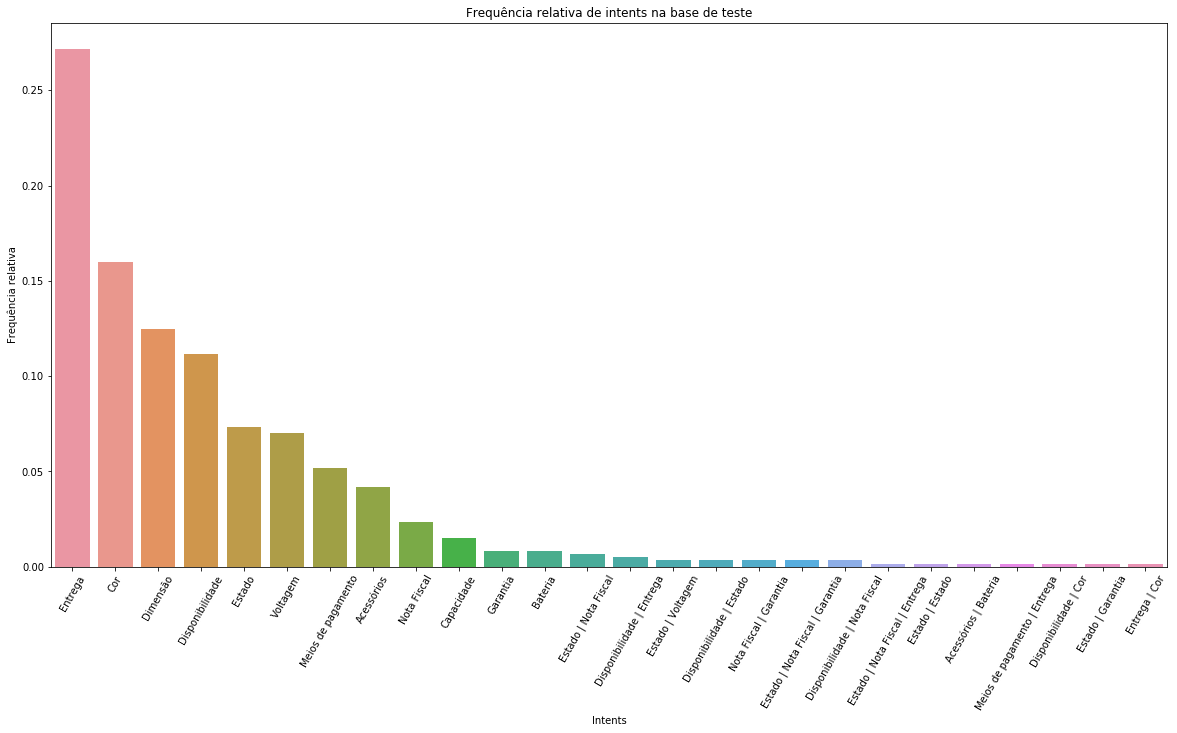

In [21]:
plt.figure(figsize=(20,10))

data = df_test["intent"].value_counts(normalize=True)

g = sns.barplot(x = data.index.tolist(), y = data.values.tolist())
plt.title("Frequência relativa de intents na base de teste")
plt.xlabel("Intents")
plt.xticks(rotation=60)
plt.ylabel("Frequência relativa")
plt.show()

ax = g
#annotate axis = seaborn axis
for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=40, color='gray', xytext=(0, 1),
                 textcoords='offset points')
_ = g.set_ylim(0, 0.4) #To make space for the annotations

### Monitoramento do modelo

O segundo analytics que mostramos funciona mais como uma percepção sobre a performance do modelo na base de testes: quantas perguntas ele errou, e de quais classes? Que perguntas ele não respondeu? Estas informações são muito importantes como um acompanhamento da performance do modelo conforme o tempo passa, deixando evidente de forma visual caso haja a necessidade de retreinamento do modelo (o que naturalmente acontece com o passar do tempo).

In [22]:
#aqui calculamos rapidamente quantas perguntas, do total, o modelo não entendeu e precisou encaminhar pro vendedor:

n_nao_sei = df_test_results[df_test_results["previsto"] == "Não sei"].shape[0]
n_total = df_test_results.shape[0]

print("\nA base de teste tem", n_total, "perguntas.")
print("\nDestas, o modelo NÃO consegui responder", n_nao_sei, "perguntas.")
print("\nIsto representa " + str(round((n_nao_sei/n_total)*100, 2))  + "% do total!\n")



A base de teste tem 600 perguntas.

Destas, o modelo NÃO consegui responder 25 perguntas.

Isto representa 4.17% do total!



Intent: Acessórios

De todas as perguntas, as frequencias de acerto e erro são:


acertou    0.8
errou      0.2
Name: analise, dtype: float64


De todas as perguntas QUE FORAM RESPONDIDAS (i.e., tirando as que ele respondeu 'Não sei', as frequencias de acerto e erro são:


acertou    0.869565
errou      0.130435
Name: analise, dtype: float64

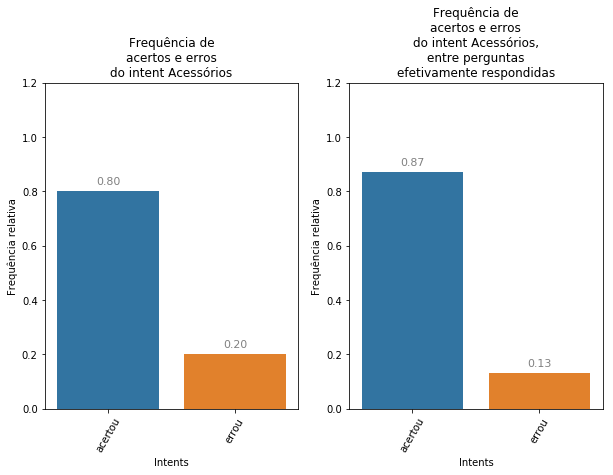


###############################################
###############################################

Intent: Acessórios | Bateria

De todas as perguntas, as frequencias de acerto e erro são:


acertou    1.0
Name: analise, dtype: float64


De todas as perguntas QUE FORAM RESPONDIDAS (i.e., tirando as que ele respondeu 'Não sei', as frequencias de acerto e erro são:


acertou    1.0
Name: analise, dtype: float64

<Figure size 432x288 with 0 Axes>

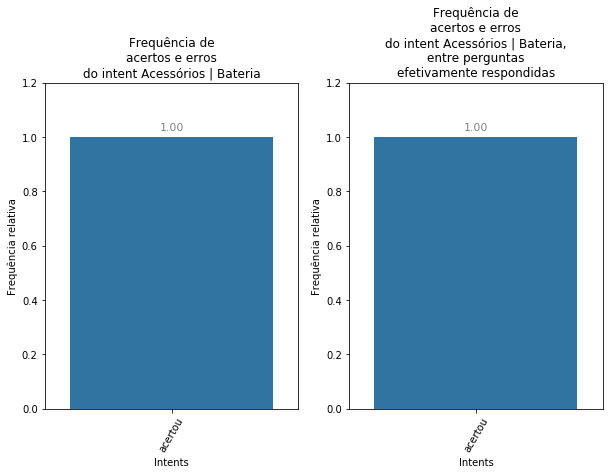


###############################################
###############################################

Intent: Bateria

De todas as perguntas, as frequencias de acerto e erro são:


acertou    1.0
Name: analise, dtype: float64


De todas as perguntas QUE FORAM RESPONDIDAS (i.e., tirando as que ele respondeu 'Não sei', as frequencias de acerto e erro são:


acertou    1.0
Name: analise, dtype: float64

<Figure size 432x288 with 0 Axes>

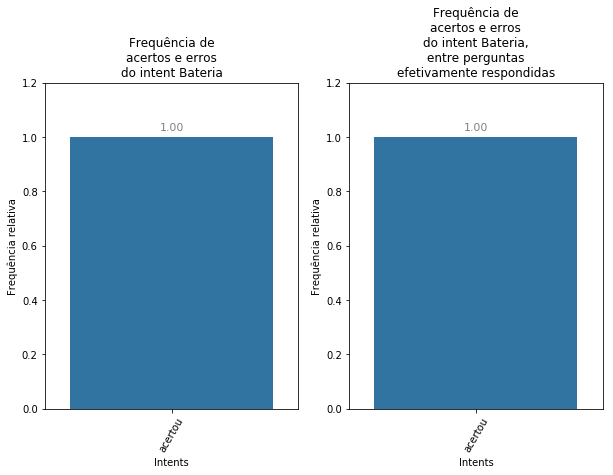


###############################################
###############################################

Intent: Capacidade

De todas as perguntas, as frequencias de acerto e erro são:


acertou    0.888889
errou      0.111111
Name: analise, dtype: float64


De todas as perguntas QUE FORAM RESPONDIDAS (i.e., tirando as que ele respondeu 'Não sei', as frequencias de acerto e erro são:


acertou    1.0
Name: analise, dtype: float64

<Figure size 432x288 with 0 Axes>

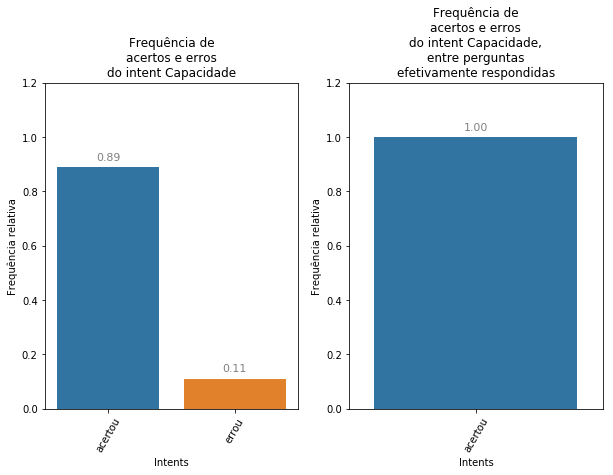


###############################################
###############################################

Intent: Cor

De todas as perguntas, as frequencias de acerto e erro são:


acertou    0.90625
errou      0.09375
Name: analise, dtype: float64


De todas as perguntas QUE FORAM RESPONDIDAS (i.e., tirando as que ele respondeu 'Não sei', as frequencias de acerto e erro são:


acertou    0.977528
errou      0.022472
Name: analise, dtype: float64

<Figure size 432x288 with 0 Axes>

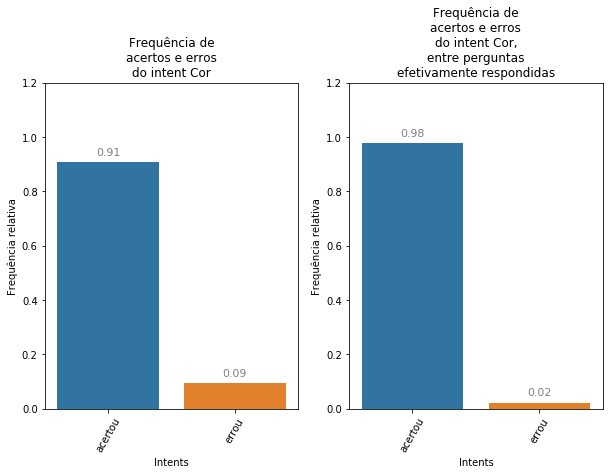


###############################################
###############################################

Intent: Dimensão

De todas as perguntas, as frequencias de acerto e erro são:


acertou    0.893333
errou      0.106667
Name: analise, dtype: float64


De todas as perguntas QUE FORAM RESPONDIDAS (i.e., tirando as que ele respondeu 'Não sei', as frequencias de acerto e erro são:


acertou    0.943662
errou      0.056338
Name: analise, dtype: float64

<Figure size 432x288 with 0 Axes>

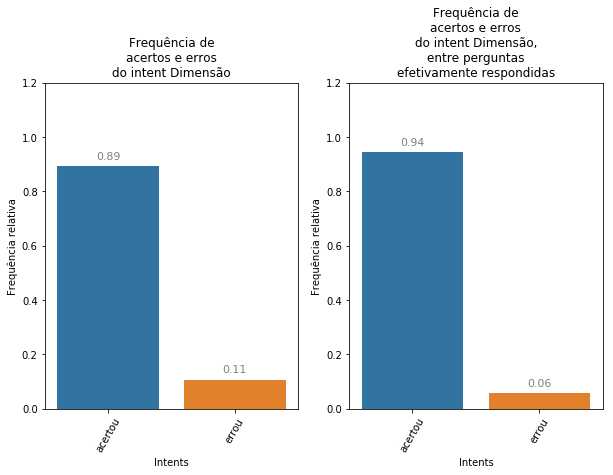


###############################################
###############################################

Intent: Disponibilidade

De todas as perguntas, as frequencias de acerto e erro são:


acertou    0.835821
errou      0.164179
Name: analise, dtype: float64


De todas as perguntas QUE FORAM RESPONDIDAS (i.e., tirando as que ele respondeu 'Não sei', as frequencias de acerto e erro são:


acertou    0.861538
errou      0.138462
Name: analise, dtype: float64

<Figure size 432x288 with 0 Axes>

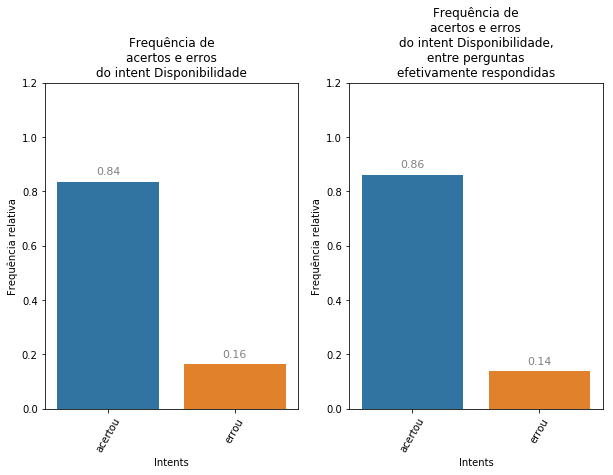


###############################################
###############################################

Intent: Disponibilidade | Cor

De todas as perguntas, as frequencias de acerto e erro são:


acertou    1.0
Name: analise, dtype: float64


De todas as perguntas QUE FORAM RESPONDIDAS (i.e., tirando as que ele respondeu 'Não sei', as frequencias de acerto e erro são:


acertou    1.0
Name: analise, dtype: float64

<Figure size 432x288 with 0 Axes>

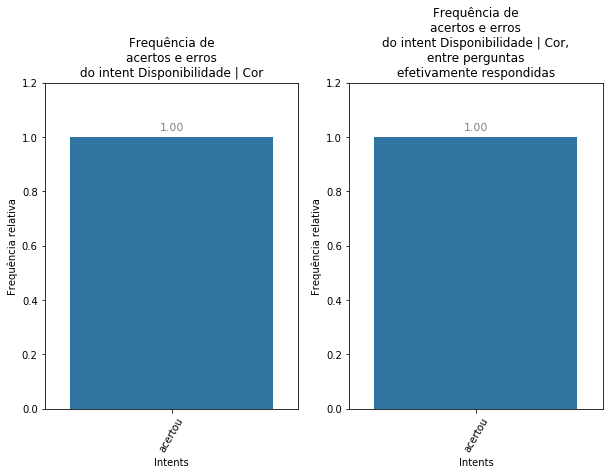


###############################################
###############################################

Intent: Disponibilidade | Entrega

De todas as perguntas, as frequencias de acerto e erro são:


acertou    1.0
Name: analise, dtype: float64


De todas as perguntas QUE FORAM RESPONDIDAS (i.e., tirando as que ele respondeu 'Não sei', as frequencias de acerto e erro são:


acertou    1.0
Name: analise, dtype: float64

<Figure size 432x288 with 0 Axes>

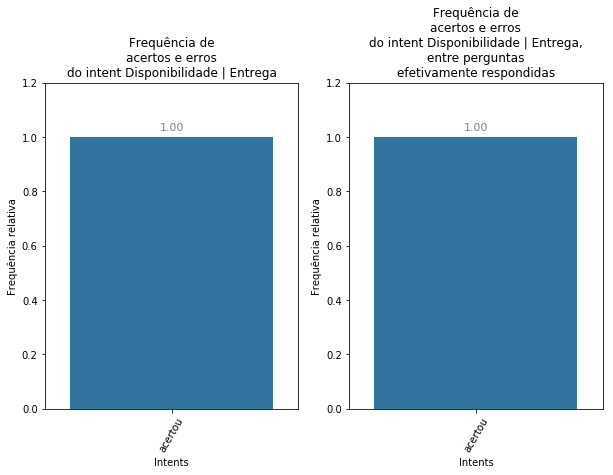


###############################################
###############################################

Intent: Disponibilidade | Estado

De todas as perguntas, as frequencias de acerto e erro são:


acertou    0.5
errou      0.5
Name: analise, dtype: float64


De todas as perguntas QUE FORAM RESPONDIDAS (i.e., tirando as que ele respondeu 'Não sei', as frequencias de acerto e erro são:


acertou    0.5
errou      0.5
Name: analise, dtype: float64

<Figure size 432x288 with 0 Axes>

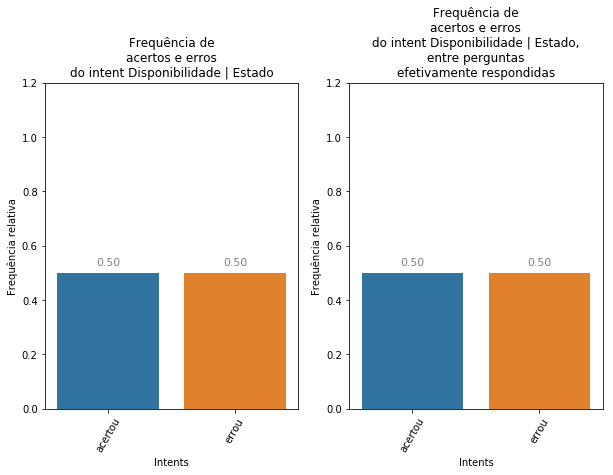


###############################################
###############################################

Intent: Disponibilidade | Nota Fiscal

De todas as perguntas, as frequencias de acerto e erro são:


acertou    1.0
Name: analise, dtype: float64


De todas as perguntas QUE FORAM RESPONDIDAS (i.e., tirando as que ele respondeu 'Não sei', as frequencias de acerto e erro são:


acertou    1.0
Name: analise, dtype: float64

<Figure size 432x288 with 0 Axes>

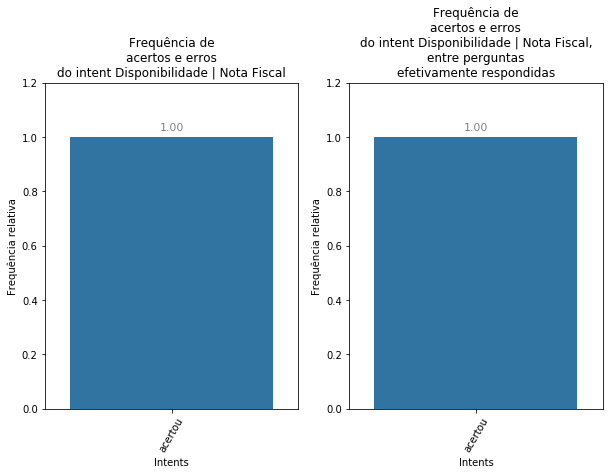


###############################################
###############################################

Intent: Entrega | Cor

De todas as perguntas, as frequencias de acerto e erro são:


acertou    1.0
Name: analise, dtype: float64


De todas as perguntas QUE FORAM RESPONDIDAS (i.e., tirando as que ele respondeu 'Não sei', as frequencias de acerto e erro são:


acertou    1.0
Name: analise, dtype: float64

<Figure size 432x288 with 0 Axes>

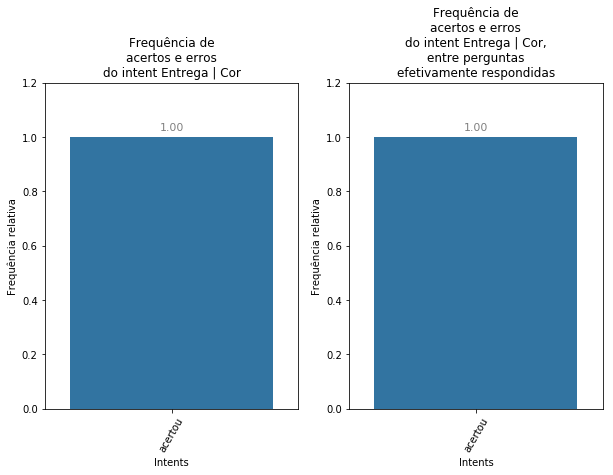


###############################################
###############################################

Intent: Entrega

De todas as perguntas, as frequencias de acerto e erro são:


acertou    0.815951
errou      0.184049
Name: analise, dtype: float64


De todas as perguntas QUE FORAM RESPONDIDAS (i.e., tirando as que ele respondeu 'Não sei', as frequencias de acerto e erro são:


acertou    0.858065
errou      0.141935
Name: analise, dtype: float64

<Figure size 432x288 with 0 Axes>

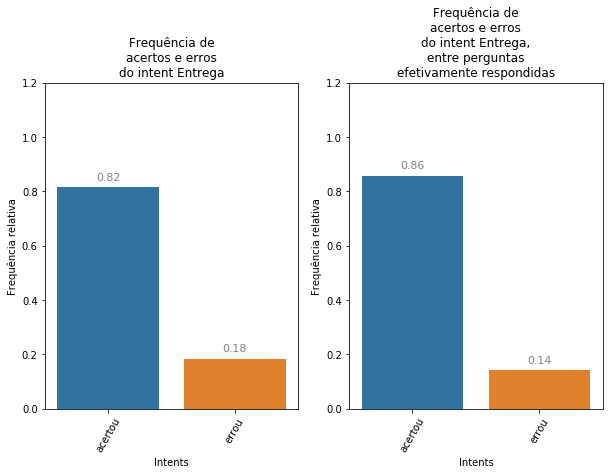


###############################################
###############################################

Intent: Estado | Estado

De todas as perguntas, as frequencias de acerto e erro são:


acertou    1.0
Name: analise, dtype: float64


De todas as perguntas QUE FORAM RESPONDIDAS (i.e., tirando as que ele respondeu 'Não sei', as frequencias de acerto e erro são:


acertou    1.0
Name: analise, dtype: float64

<Figure size 432x288 with 0 Axes>

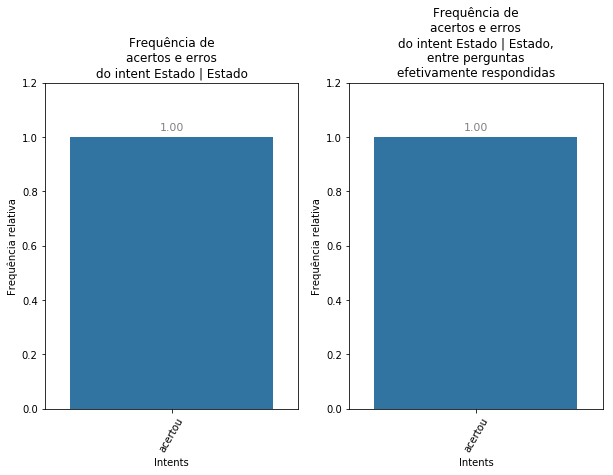


###############################################
###############################################

Intent: Estado

De todas as perguntas, as frequencias de acerto e erro são:


acertou    0.977273
errou      0.022727
Name: analise, dtype: float64


De todas as perguntas QUE FORAM RESPONDIDAS (i.e., tirando as que ele respondeu 'Não sei', as frequencias de acerto e erro são:


acertou    0.977273
errou      0.022727
Name: analise, dtype: float64

<Figure size 432x288 with 0 Axes>

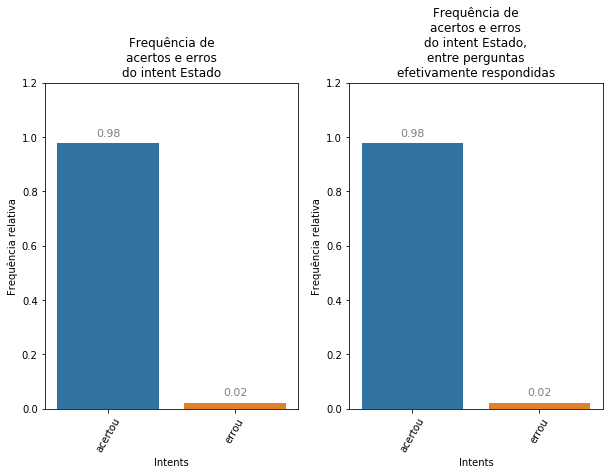


###############################################
###############################################

Intent: Estado | Garantia

De todas as perguntas, as frequencias de acerto e erro são:


acertou    1.0
Name: analise, dtype: float64


De todas as perguntas QUE FORAM RESPONDIDAS (i.e., tirando as que ele respondeu 'Não sei', as frequencias de acerto e erro são:


acertou    1.0
Name: analise, dtype: float64

<Figure size 432x288 with 0 Axes>

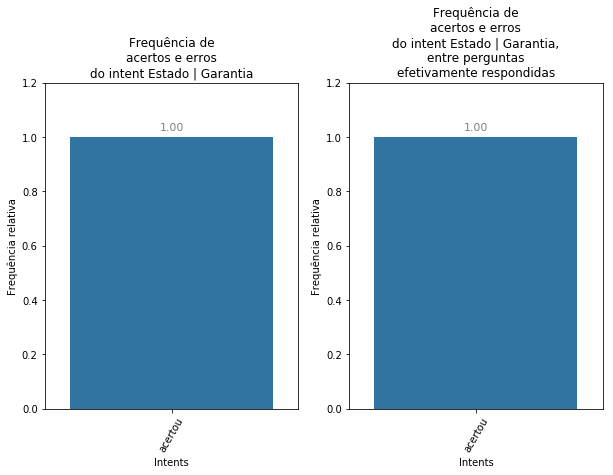


###############################################
###############################################

Intent: Estado | Nota Fiscal

De todas as perguntas, as frequencias de acerto e erro são:


acertou    1.0
Name: analise, dtype: float64


De todas as perguntas QUE FORAM RESPONDIDAS (i.e., tirando as que ele respondeu 'Não sei', as frequencias de acerto e erro são:


acertou    1.0
Name: analise, dtype: float64

<Figure size 432x288 with 0 Axes>

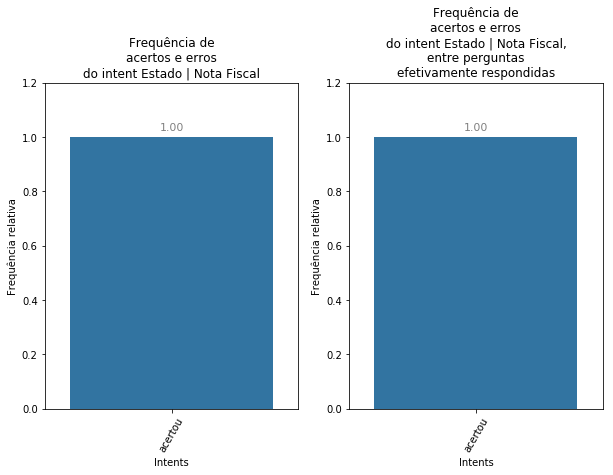


###############################################
###############################################

Intent: Estado | Nota Fiscal | Entrega

De todas as perguntas, as frequencias de acerto e erro são:


errou    1.0
Name: analise, dtype: float64


De todas as perguntas QUE FORAM RESPONDIDAS (i.e., tirando as que ele respondeu 'Não sei', as frequencias de acerto e erro são:


errou    1.0
Name: analise, dtype: float64

<Figure size 432x288 with 0 Axes>

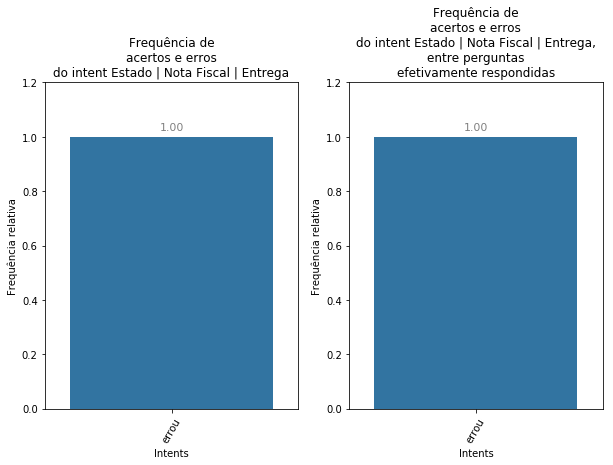


###############################################
###############################################

Intent: Estado | Nota Fiscal | Garantia

De todas as perguntas, as frequencias de acerto e erro são:


acertou    0.5
errou      0.5
Name: analise, dtype: float64


De todas as perguntas QUE FORAM RESPONDIDAS (i.e., tirando as que ele respondeu 'Não sei', as frequencias de acerto e erro são:


acertou    0.5
errou      0.5
Name: analise, dtype: float64

<Figure size 432x288 with 0 Axes>

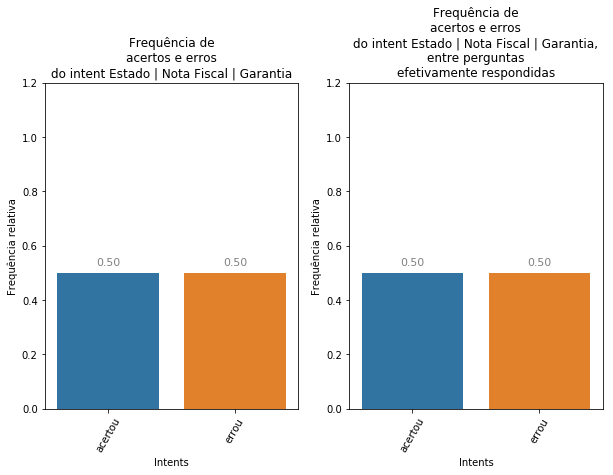


###############################################
###############################################

Intent: Estado | Voltagem

De todas as perguntas, as frequencias de acerto e erro são:


acertou    1.0
Name: analise, dtype: float64


De todas as perguntas QUE FORAM RESPONDIDAS (i.e., tirando as que ele respondeu 'Não sei', as frequencias de acerto e erro são:


acertou    1.0
Name: analise, dtype: float64

<Figure size 432x288 with 0 Axes>

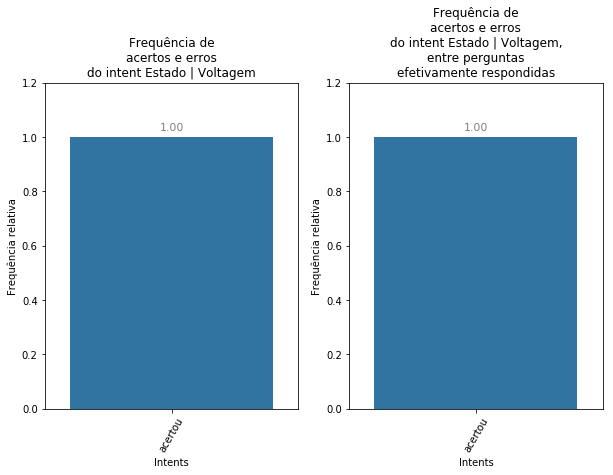


###############################################
###############################################

Intent: Garantia

De todas as perguntas, as frequencias de acerto e erro são:


acertou    1.0
Name: analise, dtype: float64


De todas as perguntas QUE FORAM RESPONDIDAS (i.e., tirando as que ele respondeu 'Não sei', as frequencias de acerto e erro são:


acertou    1.0
Name: analise, dtype: float64

<Figure size 432x288 with 0 Axes>

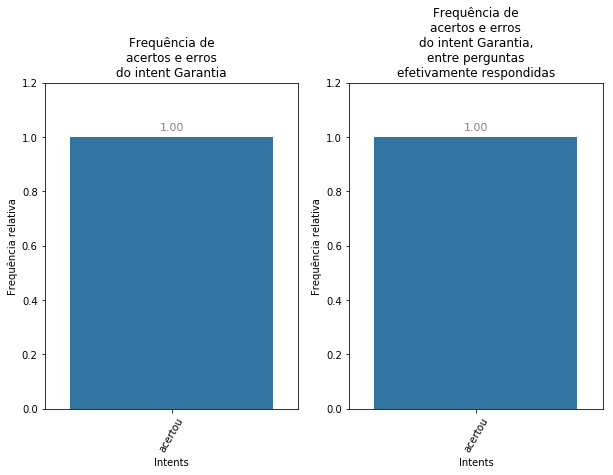


###############################################
###############################################

Intent: Meios de pagamento

De todas as perguntas, as frequencias de acerto e erro são:


acertou    0.870968
errou      0.129032
Name: analise, dtype: float64


De todas as perguntas QUE FORAM RESPONDIDAS (i.e., tirando as que ele respondeu 'Não sei', as frequencias de acerto e erro são:


acertou    0.870968
errou      0.129032
Name: analise, dtype: float64

<Figure size 432x288 with 0 Axes>

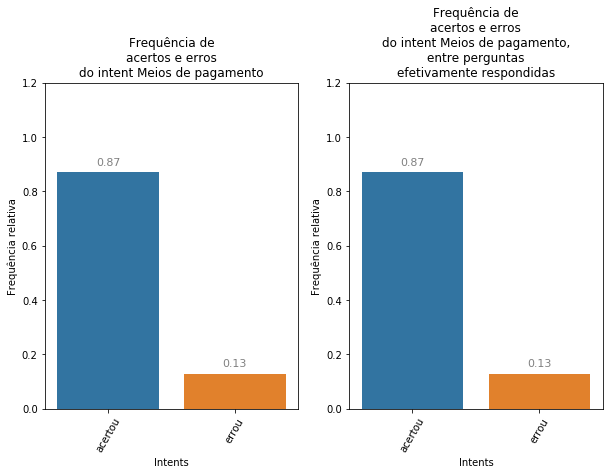


###############################################
###############################################

Intent: Meios de pagamento | Entrega

De todas as perguntas, as frequencias de acerto e erro são:


acertou    1.0
Name: analise, dtype: float64


De todas as perguntas QUE FORAM RESPONDIDAS (i.e., tirando as que ele respondeu 'Não sei', as frequencias de acerto e erro são:


acertou    1.0
Name: analise, dtype: float64

<Figure size 432x288 with 0 Axes>

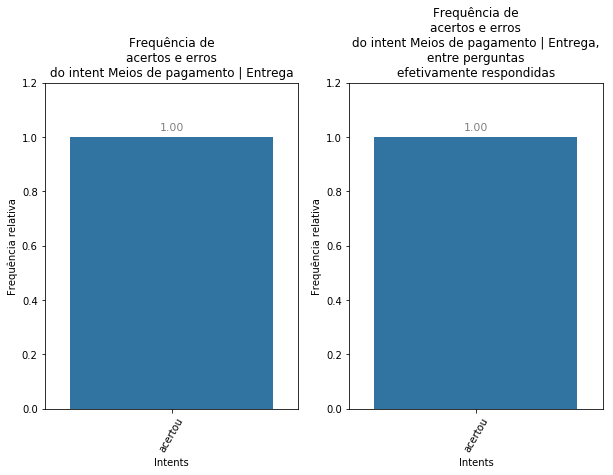


###############################################
###############################################

Intent: Nota Fiscal

De todas as perguntas, as frequencias de acerto e erro são:


acertou    1.0
Name: analise, dtype: float64


De todas as perguntas QUE FORAM RESPONDIDAS (i.e., tirando as que ele respondeu 'Não sei', as frequencias de acerto e erro são:


acertou    1.0
Name: analise, dtype: float64

<Figure size 432x288 with 0 Axes>

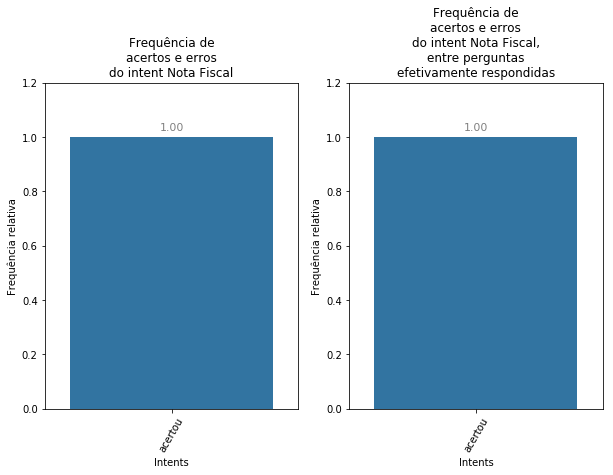


###############################################
###############################################

Intent: Nota Fiscal | Garantia

De todas as perguntas, as frequencias de acerto e erro são:


acertou    1.0
Name: analise, dtype: float64


De todas as perguntas QUE FORAM RESPONDIDAS (i.e., tirando as que ele respondeu 'Não sei', as frequencias de acerto e erro são:


acertou    1.0
Name: analise, dtype: float64

<Figure size 432x288 with 0 Axes>

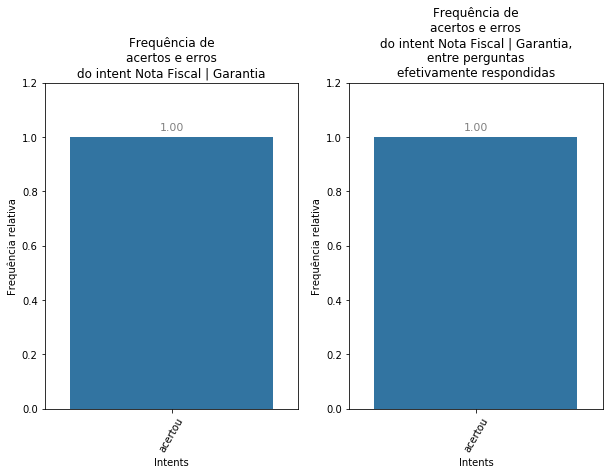


###############################################
###############################################

Intent: Voltagem

De todas as perguntas, as frequencias de acerto e erro são:


acertou    0.97619
errou      0.02381
Name: analise, dtype: float64


De todas as perguntas QUE FORAM RESPONDIDAS (i.e., tirando as que ele respondeu 'Não sei', as frequencias de acerto e erro são:


acertou    1.0
Name: analise, dtype: float64

<Figure size 432x288 with 0 Axes>

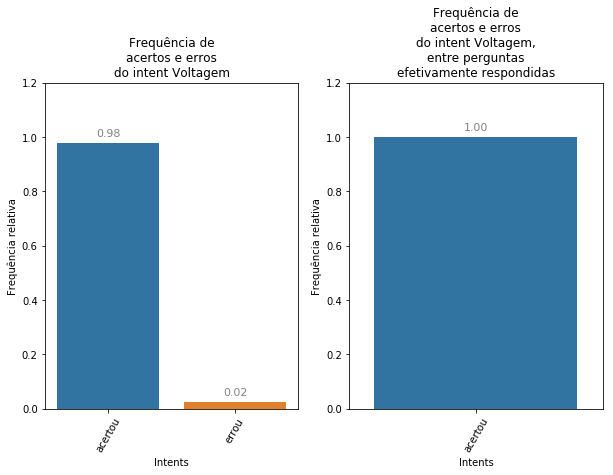


###############################################
###############################################



<Figure size 432x288 with 0 Axes>

In [23]:
for item in df_test_results["intent"].unique().tolist():
    
    print("Intent:", item)
    
    print("\nDe todas as perguntas, as frequencias de acerto e erro são:")
    aux = df_test_results[df_test_results["intent"] == item]
    count = aux["analise"].value_counts(normalize=True)
    display(count)
    
    plt.subplots(1, 2, figsize=(10, 6))
    
    plt.subplot(1,2,1)
    g = sns.barplot(x = count.index.tolist(), y = count.values.tolist())
    plt.title("Frequência de\nacertos e erros\ndo intent " + item)
    plt.xlabel("Intents")
    plt.xticks(rotation=60)
    plt.ylabel("Frequência relativa")
    
    ax=g
    #annotate axis = seaborn axis
    for p in ax.patches:
                 ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=11, color='gray', xytext=(0, 10),
                     textcoords='offset points')
    _ = g.set_ylim(0, 1.2) #To make space for the annotations

    
    print("\nDe todas as perguntas QUE FORAM RESPONDIDAS (i.e., tirando as que ele respondeu 'Não sei', as frequencias de acerto e erro são:")
    aux = aux[aux["previsto"] != "Não sei"]
    count = aux["analise"].value_counts(normalize=True)
    display(count)
    
    
    plt.subplot(1,2,2)
    g=sns.barplot(x = count.index.tolist(), y = count.values.tolist())
    plt.title("Frequência de\nacertos e erros\ndo intent " + item + ",\nentre perguntas\nefetivamente respondidas")
    plt.xlabel("Intents")
    plt.xticks(rotation=60)
    plt.ylabel("Frequência relativa")
    
    ax=g
    #annotate axis = seaborn axis
    for p in ax.patches:
                 ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=11, color='gray', xytext=(0, 10),
                     textcoords='offset points')
    _ = g.set_ylim(0, 1.2) #To make space for the annotations
    
    plt.show()
    
    
    plt.tight_layout()
    
    print("\n###############################################")
    print("###############################################\n")

## Passo 7: GUI

Por fim, construímos uma interface gráfica bem simples para ilustrar o funcionamento do robô e simular como seria o robô em produção, isto é: 

- O potencial comprador procura por um produto (dentre os 10 que temos cadastrados);
- O produto aparece pro potencia comprador (aqui exibimos apenas uma imagem ilustrativa);
- O potencial comprador tem um campo para fazer alguma pergunta;
- Imediatamente após enviar a pergunta, o robô elabora a resposta e a exibe, contendo sempre detalhes das informações cadastradas na base de produtos.

Ressaltamos que nossa solução dispensa completamente a necessidade de uma interface gráfica: nosso robô estaria implantado na plataforma da olist, de modo que todo o processamento seria feito na própria plataforma, segundo o fluxo que descrevemos anteriormente. Assim, fizemos a interface gráfica apenas para fins de apresentação e demonstração da usabilidade de nossa solução no pitch.

No código da interface, temos a função "bot()", que é muito similar à "previsao()", que descrevemos anteriormente. Esta função é muitissimo importante, pois é nela que o modelo retorna os intents mais prováveis, conforme critério que já discutimos. A único diferença é que aqui a função realmente retorna a resposta (note que a função "resposta_bot()" é chamada!).

Vejamos a interface em funcionamento:

In [24]:
import tkinter as tk

def coletar_produto(produto):
    
    global product_global
    
    foto = tk.PhotoImage(file="./imagens/"+produto+".png")
    label_imagem = tk.Label(frame_imagem, image=foto)
    label_imagem.image = foto
    label_imagem.place(relheight=1, relwidth=1)
    
    if produto == "celular":
        product_global = 'Samsung Galaxy J2'
    elif produto == "controle":
        product_global = 'Controle joystick Sony Dualshock 4 500 million limited edition'
    elif produto == "forno":
        product_global = 'Forno Elétrico Inox Premium Lenoxx- Pfo 303'

    
################################################

def coletar_pergunta(question):
    
    ans = bot(th1=2.5, pergunta=question, produto=product_global) 
    
    texto_resposta = tk.Label(frame_resposta, bg='white', text=ans, anchor='nw', font=("Courier", 15), justify="left")
    texto_resposta.place(relheight=1, relwidth=1)

    return pergunta
    
################################################

def callback(sv):
    global produto
    produto = (sv.get())
    
################################################

def bot(th1=2.5, pergunta="", produto=""):

    model = fit
    
    pergunta_pp = pre_proc(pergunta)

    X = cv.transform([pergunta_pp]).toarray()

    class_probs = model.predict_proba(X)

    th2 = 1/len(model.classes_)

    class_max = class_probs[class_probs > class_probs.max() - th1*th2]

    resposta = []
    nao_sei = True
    for prob in class_max:
        if prob > th1*th2:
            y_pred = model.classes_[class_probs.squeeze().tolist().index(prob)]
            resposta.append(respostas_bot(prod = base_de_produtos, intent = y_pred, produto = produto))
            nao_sei = False
            
    resposta2 = []
    check = False
    for item in resposta:
        if check:
            a = item.replace("Olá! ", "")
        else:
            a = item
        if "Olá" in item:
            check = True
        resposta2.append(a)
    
    resposta = "\n".join(resposta2)

    if nao_sei:
        resposta = "Não entendi a pergunta. Vou direcioná-la ao vendedor, e ele te responderá o mais rápido possível!" 
        
    return(resposta)


################################################

# configuração inicial

janela_principal = tk.Tk() # single window
janela_principal.title('www.marketplace.com.br')
canvas = tk.Canvas(janela_principal, height=1000, width=1000) # tamanho da janela ao abrir
canvas.pack()

# cabeçalhos e bordas

frame_cabeçalho = tk.Frame(janela_principal, bg='#003ec5')
frame_cabeçalho.place(relwidth=1, relheight=0.10)


frame_produto = tk.Frame(janela_principal, bg='#cbcbb3', bd=1)
frame_produto.place(relwidth=0.3, relheight=0.05, relx=0.1, rely=0.173)
frame_imagem = tk.Frame(janela_principal)
frame_imagem.place(relwidth=0.3, relheight=0.38, relx=0.073, rely=0.235)


frame_pergunta = tk.Frame(janela_principal, bg='#cbcbb3', bd=1)
frame_pergunta.place(relwidth=0.6, relheight=0.1, relx=0.1, rely=0.67)
frame_resposta = tk.Frame(janela_principal, bg='#cbcbb3', bd=1)
frame_resposta.place(relwidth=0.6, relheight=0.1, relx=0.1, rely=0.85)

# botões

botao_produto = tk.Button(janela_principal, text='OK', bg='#edad00', fg='white', font='Helvetica 12 bold', command=lambda: coletar_produto(entrada_produto.get()))
botao_produto.place(relheight=0.05, relwidth=0.05, relx=0.41, rely=0.173)
botao_pergunta = tk.Button(janela_principal, text='Enviar Pergunta', bg='#edad00', fg='white', font='Helvetica 12 bold', command=lambda: coletar_pergunta(entrada_pergunta.get()))
botao_pergunta.place(relheight=0.08, relwidth=0.15, rely=0.681, relx=0.723)

# labels
label_titulo = tk.Label(janela_principal, text='olist', fg='white', bg='#003ec5', font='Courier 30 bold')
label_titulo.place(relheight=0.05, width=118, relx=0.1, rely=0.035)
label_produto = tk.Label(janela_principal, text='Produto', font=40, fg='#24221d', anchor='w')
label_produto.place(relheight=0.05, width=100, relx=0.1, rely=0.12)
label_pergunta = tk.Label(janela_principal, text='Pergunte ao vendedor', font=40, fg='#24221d', anchor='w')
label_pergunta.place(relheight=0.05, width=200, relx=0.1, rely=0.615)


label_resposta = tk.Label(janela_principal, text='Resposta', font=40, fg='#24221d', anchor='w')
label_resposta.place(relheight=0.05, width=200, relx=0.1, rely=0.795)

texto_resposta = tk.Label(frame_resposta, bg='white', text='', anchor='nw', font=("Courier", 15))
texto_resposta.place(relheight=1, relwidth=1)

# entries

entrada_produto = tk.Entry(frame_produto, font=("Courier", 15), bg='white')
entrada_produto.place(relheight=1, relwidth=1)
entrada_pergunta = tk.Entry(frame_pergunta, font=("Courier", 15), bg='white')
entrada_pergunta.place(relheight=1, relwidth=1)


janela_principal.mainloop()